# Extraction of extents from netcdf dataset

In [1]:
from awrams.utils.extract import extract,localise_extent_to_ncfile
from awrams.utils.ts.gridded_time_series import TimeSeriesDataSet
import awrams.utils.ts.processing as processing
from awrams.utils.io.general import h5py_cleanup_nc_mess

from awrams.utils.catchments import CatchmentDB
catchments = CatchmentDB()

import awrams.utils.datetools as dt

import os

# Plotting
from matplotlib import pyplot as plt
%matplotlib inline

## extract and spatially aggregate catchments

In [2]:
var_name = 'rain_day'

data_path = '../../test_data/calibration/'
pattern = data_path + '/%s*' % var_name
ncfile = data_path + '/%s_1990.nc' % var_name

period = dt.dates('jul 1990 - jun 1995')

df = extract(var_name,
             pattern,
             {'204007':localise_extent_to_ncfile(catchments.get_by_id('204007'),ncfile),
              '421103':localise_extent_to_ncfile(catchments.get_by_id('421103'),ncfile)},
             period)
df

2016-10-13 04:35:41,886 INFO Running
2016-10-13 04:35:41,889 INFO Running period: July - December 1990: 
2016-10-13 04:35:41,890 INFO 0.00% complete
2016-10-13 04:35:42,191 INFO Running period: 1991: 
2016-10-13 04:35:42,192 INFO 10.08% complete
2016-10-13 04:35:42,528 INFO Running period: 1992: 
2016-10-13 04:35:42,529 INFO 30.07% complete
2016-10-13 04:35:42,825 INFO Running period: 1993: 
2016-10-13 04:35:42,826 INFO 50.11% complete
2016-10-13 04:35:43,120 INFO Running period: 1994: 
2016-10-13 04:35:43,121 INFO 70.10% complete
2016-10-13 04:35:43,418 INFO Running period: January - June 1995: 
2016-10-13 04:35:43,419 INFO 90.09% complete
2016-10-13 04:35:43,775 INFO Finished


,204007,421103
1990-07-01,1.074465,8.188409
1990-07-02,5.240235,16.567407
1990-07-03,0.347165,11.315883
1990-07-04,0.262357,6.869347
1990-07-05,0.017216,4.365312
1990-07-06,0.106171,9.357732
1990-07-07,0.051124,2.513970
1990-07-08,0.000000,1.324210
1990-07-09,0.024706,0.000000
1990-07-10,0.000000,0.000000


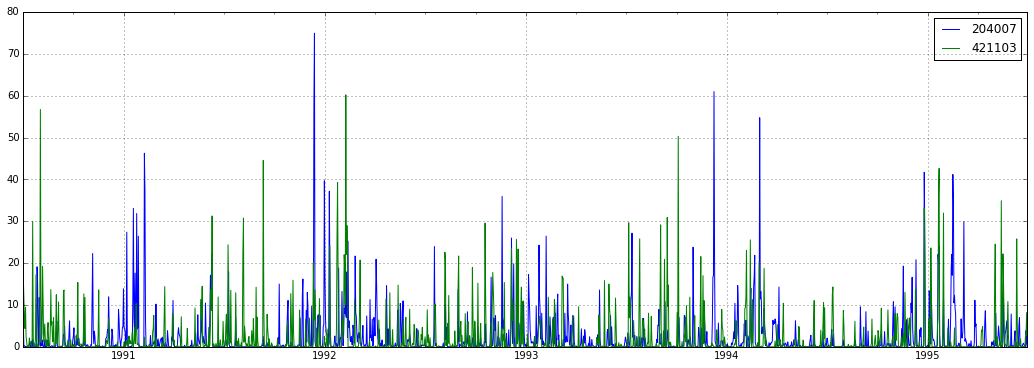

In [3]:
ax = plt.figure(figsize=(18,6)).gca()
df.plot(ax=ax)

## extract a catchment

In [4]:
period = dt.dates('jul 1990')

In [5]:
### requires osgeo.ogr to process shapefiles
catchment = catchments.get_by_id('204007')
catchment.cell_count

729

In [6]:
# path = os.getcwd()
# path = os.path.join(path,'..','..','calibration','tests','data')
data_path = '../../test_data/calibration/'

pattern = data_path + '/rain_day*'

ds = TimeSeriesDataSet('rain_day',pattern)
data = ds.get_data(period,catchment)
ds.close_all()
# h5py_cleanup_nc_mess(show_log=True)

data.shape,catchment.cell_count

((31, 45, 27), 729)

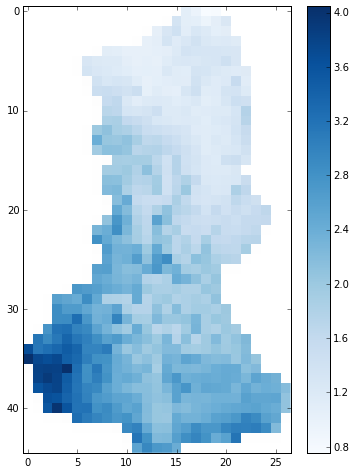

In [7]:
plt.figure(figsize=(6,8))
im = plt.imshow(data.mean(axis=0),interpolation='None',cmap=plt.get_cmap('Blues'))
plt.colorbar(im)